# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [6]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [7]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


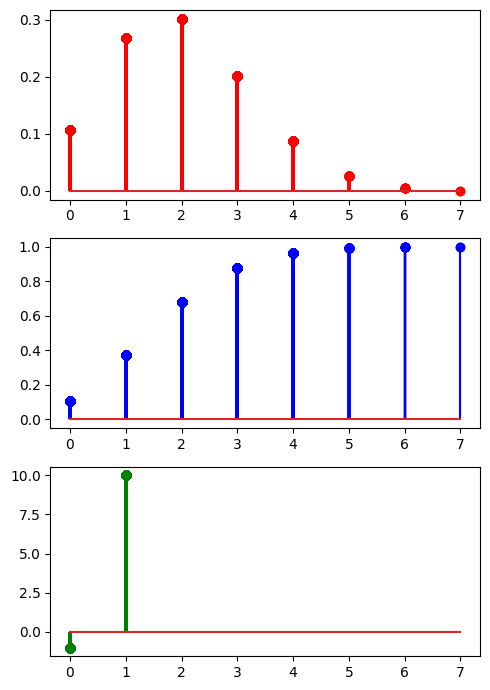

In [8]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [18]:
from scipy.stats import norm, uniform
import numpy as np


# Define all the probability functions related to these distributions


def dnorm(x, mean = 0, sd = 1):
    """
    Calculates the point estimate of the normal distribution
    """
    result = norm.pdf(x = x, loc = mean, scale = sd)

    return result

def pnorm(q, mean = 0, sd = 1):
    """
    Calculates the cumulative of the normal distribution
    """
    result = norm.cdf(x = q, loc = mean, scale = sd)

    return result

def qnorm(p, mean = 0, sd = 1):
    """
    Calculates the quantile function from the normal distribution
    """
    result = norm.ppf(q = p, loc = mean, scale = sd)

    return result

def rnorm(n, mean = 0, sd = 1):
    """
    Generates random variables from the normal distribution
    """
    result = norm.rvs(loc = mean, scale = sd, size = n)

    return result

def dunif(x, min = 0, max = 1):
    """
    Calculates the point estimate of the uniform distribution
    """
    result = uniform.pdf(x = x, loc = min, scale = max - min)

    return result

def punif(q, min = 0, max = 1):
    """
    Calculates the cumulative of the uniform distribution
    """
    result = uniform.cdf(x = q, loc = min, scale = max - min)

    return result

def qunif(p, min = 0, max = 1):
    """
    Calculates the quantile function from the uniform distribution
    """
    result = uniform.ppf(q = p, loc = min, scale = max - min)

    return result

def runif(n, min = 0, max = 1):
    """
    Generates random variables from the uniform distribution
    """
    result = uniform.rvs(loc = min, scale = max - min, size = n)

    return result

np.random.seed(42)

print(f"Normal PDF at x = 0: {dnorm(0)}")
print(f"Normal CDF at x = 1: {pnorm(1)}")
print(f"Normal rvs (n = 5): {rnorm(5)}")
print(f"Uniform PDF at x = 0.5 (0, 1): {dunif(0.5)}")
print(f"Uniform CDF at x = 0.5 (0, 1): {punif(0.5)}")
print(f"Uniform rvs (n = 5) (0, 1): {runif(5)}")

Normal PDF at x = 0: 0.3989422804014327
Normal CDF at x = 1: 0.8413447460685429
Normal rvs (n = 5): [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
Uniform PDF at x = 0.5 (0, 1): 1.0
Uniform CDF at x = 0.5 (0, 1): 0.5
Uniform rvs (n = 5) (0, 1): [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449]


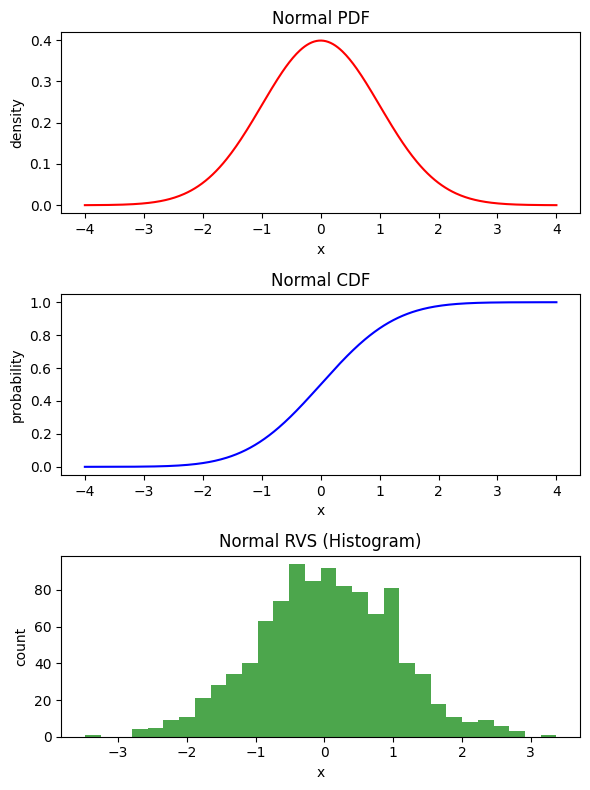

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 400)
samples = rnorm(1000)

pdf = dnorm(x)
cdf = pnorm(x)

fig, axis = plt.subplots(3, 1, figsize = (6, 8))

axis[0].plot(x, pdf, "r-")
axis[0].set_title("Normal PDF")
axis[0].set_xlabel("x")
axis[0].set_ylabel("density")

axis[1].plot(x, cdf, "b-")
axis[1].set_title("Normal CDF")
axis[1].set_xlabel("x")
axis[1].set_ylabel("probability")

axis[2].hist(samples, bins = 30, color = "g", alpha = 0.7)
axis[2].set_title("Normal RVS (Histogram)")
axis[2].set_xlabel("x")
axis[2].set_ylabel("count")

plt.tight_layout()
plt.show()